##Neural Networks in PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms

In [ ]:
dataset_train = dsets.MNIST(root = './data', train = True, download =True, transform=transforms.ToTensor())
dataset_val = dsets.MNIST(root = './data', train = False, download =True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 88777425.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121866895.20it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36839956.73it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 24805376.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



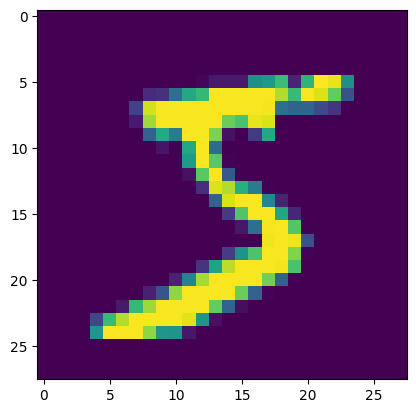

In [ ]:
plt.imshow(dataset_train[0][0].view(28,28).numpy())

In [ ]:
print(dataset_train[0][1])

5


In [ ]:
class Net_sigmoid(nn.Module):
  def __init__(self,layers):
    super(Net_sigmoid, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      self.hidden.append(nn.Linear(input, output))

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.sigmoid(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
Model = Net_sigmoid([2,1,2])

In [ ]:
Model.state_dict()

OrderedDict([('hidden.0.weight', tensor([[-0.6777, -0.5966]])),
             ('hidden.0.bias', tensor([0.5457])),
             ('hidden.1.weight',
              tensor([[-0.7534],
                      [-0.5479]])),
             ('hidden.1.bias', tensor([ 0.1213, -0.4295]))])

In [ ]:
dataset_train[0][0].view(-1, 28 * 28).shape

torch.Size([1, 784])

In [ ]:
model1 = Net_sigmoid([784,5,10])

In [ ]:
def train_model(model, criterion, train_loader, val_loader, optimizer, epochs = 100):
  useful_stuff = {'training_loss':[], 'validation_accuracy':[]}
  for epoch in range(epochs):
    for (x,y) in train_loader:
      x = x.view(-1, 28*28)
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.data.item())

    correct = 0
    for x, y in val_loader:
        model.eval()
        yhat = model(x.view(-1, 28 * 28))
        _, label = torch.max(yhat, 1)
        correct += (label == y).sum().item()
    accuracy = 100 * (correct / len(dataset_val))
    useful_stuff['validation_accuracy'].append(accuracy)

  return useful_stuff

In [ ]:
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)

In [ ]:
train1 =  train_model(model = model1, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

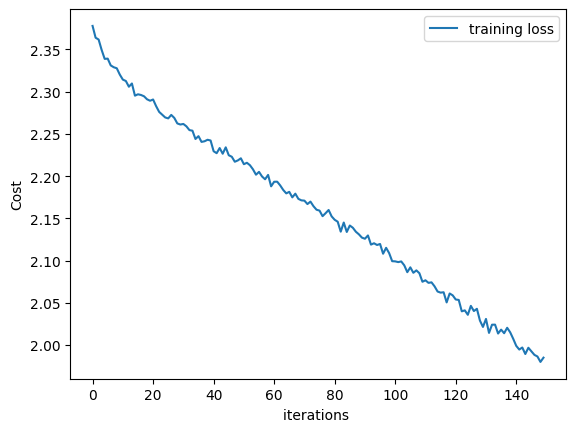

In [ ]:
plt.plot(train1['training_loss'], label = 'training loss')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

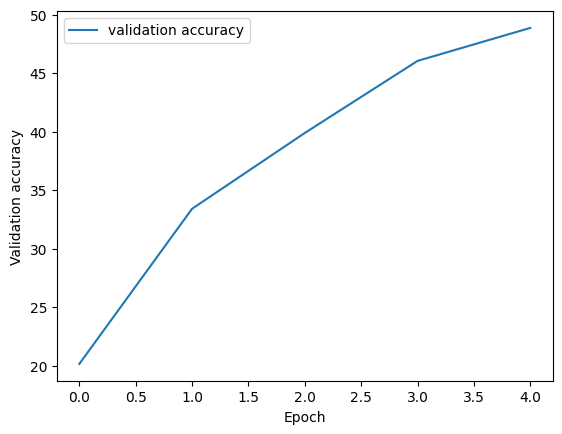

In [ ]:
plt.plot(train1['validation_accuracy'], label = 'validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#incresing number of hidden layers

model1_1 = Net_sigmoid([784,10,10,10])

criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)

train1_1 =  train_model(model = model1_1, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

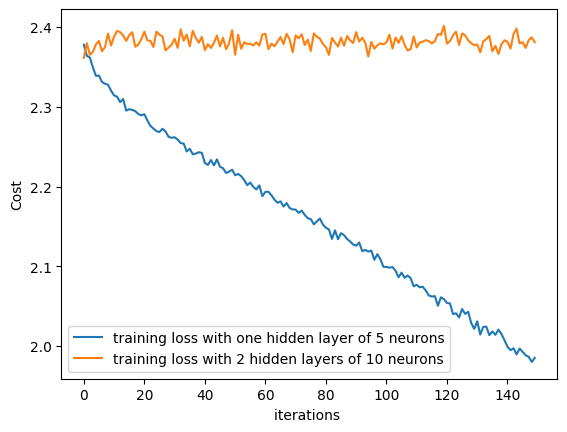

In [ ]:
plt.plot(train1['training_loss'], label = 'training loss with one hidden layer of 5 neurons')
plt.plot(train1_1['training_loss'], label = 'training loss with 2 hidden layers of 10 neurons')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

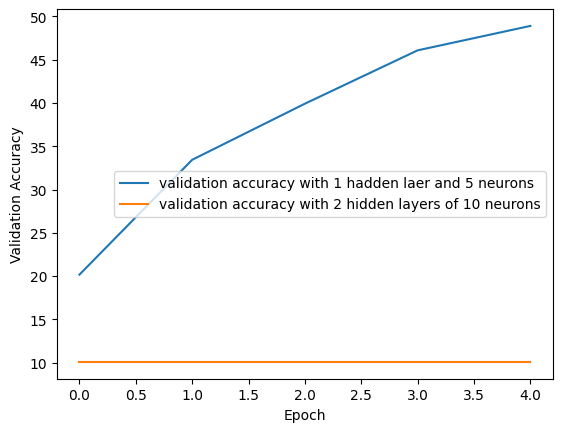

In [ ]:
plt.plot(train1['validation_accuracy'], label = 'validation accuracy with 1 hadden laer and 5 neurons')
plt.plot(train1_1['validation_accuracy'], label = 'validation accuracy with 2 hidden layers of 10 neurons')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Activation Functions

In [ ]:
class Net_relu(nn.Module):
  def __init__(self,layers):
    super(Net_relu, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      self.hidden.append(nn.Linear(input, output))

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.relu(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
model2 = Net_relu([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model2.parameters(), lr = 0.1)

In [ ]:
train2 =  train_model(model = model2, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

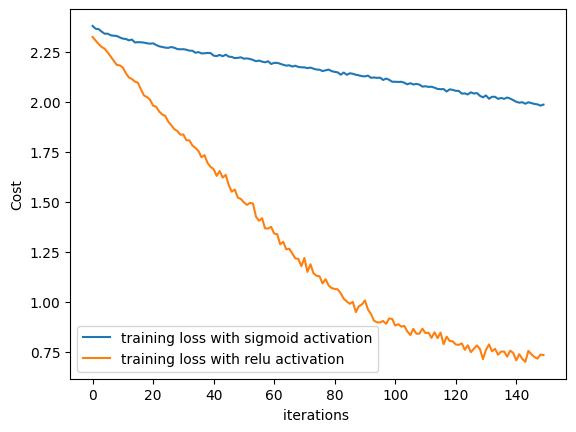

In [ ]:
plt.plot(train1['training_loss'], label = 'training loss with sigmoid activation')
plt.plot(train2['training_loss'], label = 'training loss with relu activation')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

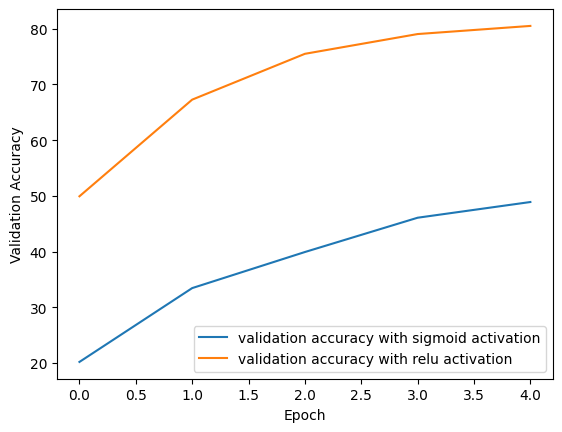

In [ ]:
plt.plot(train1['validation_accuracy'], label = 'validation accuracy with sigmoid activation')
plt.plot(train2['validation_accuracy'], label = 'validation accuracy with relu activation')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
class Net_tanh(nn.Module):
  def __init__(self,layers):
    super(Net_tanh, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      self.hidden.append(nn.Linear(input, output))

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.tanh(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
model3 = Net_tanh([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model3.parameters(), lr = 0.1)

In [ ]:
train3 =  train_model(model = model3, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

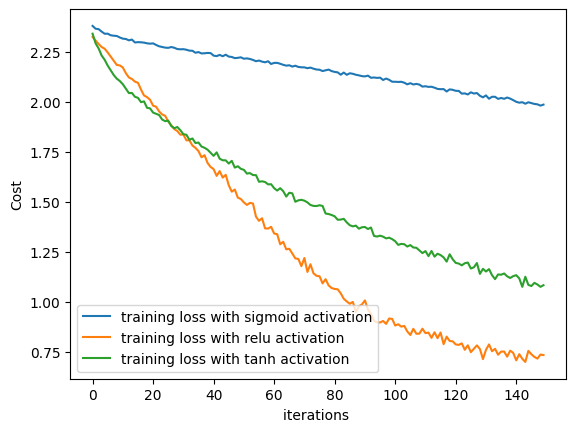

In [ ]:
plt.plot(train1['training_loss'], label = 'training loss with sigmoid activation')
plt.plot(train2['training_loss'], label = 'training loss with relu activation')
plt.plot(train3['training_loss'], label = 'training loss with tanh activation')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

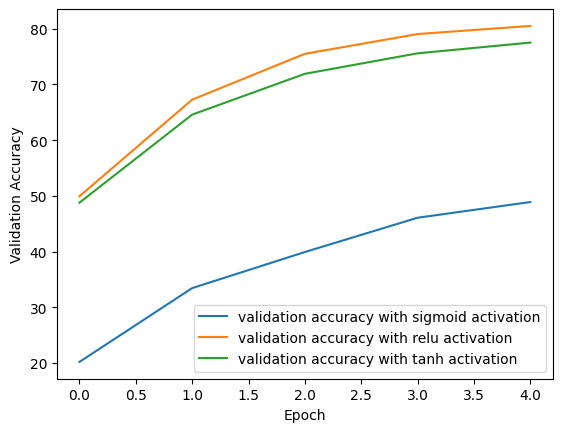

In [ ]:
plt.plot(train1['validation_accuracy'], label = 'validation accuracy with sigmoid activation')
plt.plot(train2['validation_accuracy'], label = 'validation accuracy with relu activation')
plt.plot(train3['validation_accuracy'], label = 'validation accuracy with tanh activation')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#with dropout
#initializing weights
#adding momentum
#batch normalization

### Dropout

In [ ]:
class Net_dropout(nn.Module):
  def __init__(self,layers, p=0.5):
    super(Net_dropout, self).__init__()
    self.hidden = nn.ModuleList()
    self.drop = nn.Dropout(p = p)
    for input, output in zip(layers, layers[1:]):
      self.hidden.append(nn.Linear(input, output))

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.relu(self.drop(layer(x)))
      else:
        x = layer(x)
    return x

In [ ]:
model4 = Net_dropout([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model4.parameters(), lr = 0.1)

In [ ]:
train4 =  train_model(model = model4, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

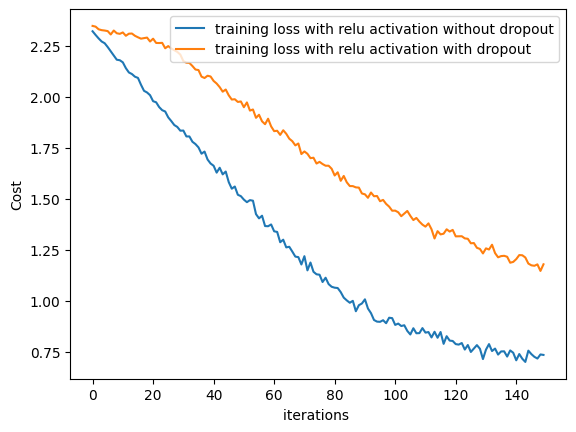

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without dropout')
plt.plot(train4['training_loss'], label = 'training loss with relu activation with dropout')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

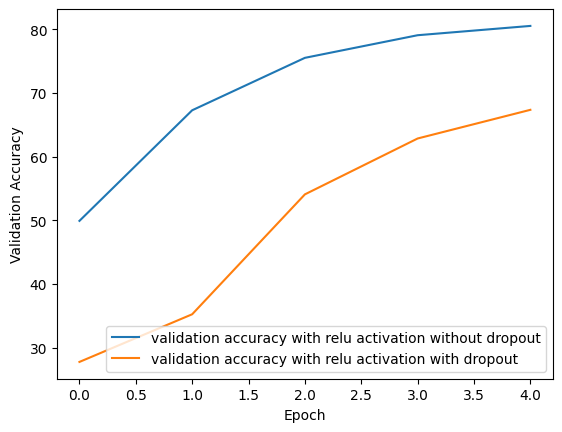

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation accuracy with relu activation without dropout')
plt.plot(train4['validation_accuracy'], label = 'validation accuracy with relu activation with dropout')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Initialization methods

In [ ]:
#initializing weights
#uniform initializations
class Net_uniform_init(nn.Module):
  def __init__(self,layers):
    super(Net_uniform_init, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      linear = nn.Linear(input, output)
      linear.weight.data.uniform_(0, 1)
      self.hidden.append(linear)

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.relu(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
model5 = Net_uniform_init([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model5.parameters(), lr = 0.1)

In [ ]:
train5 =  train_model(model = model5, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

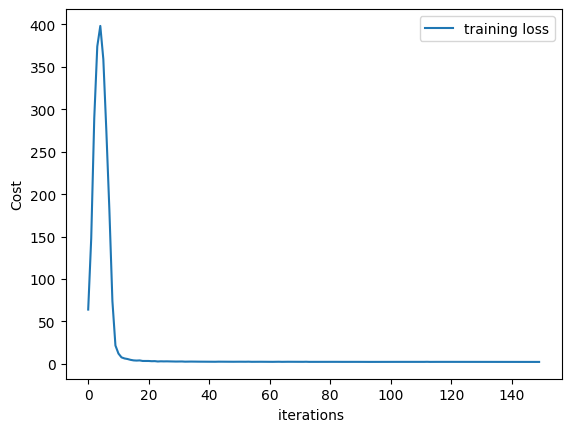

In [ ]:
plt.plot(train5['training_loss'], label = 'training loss')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

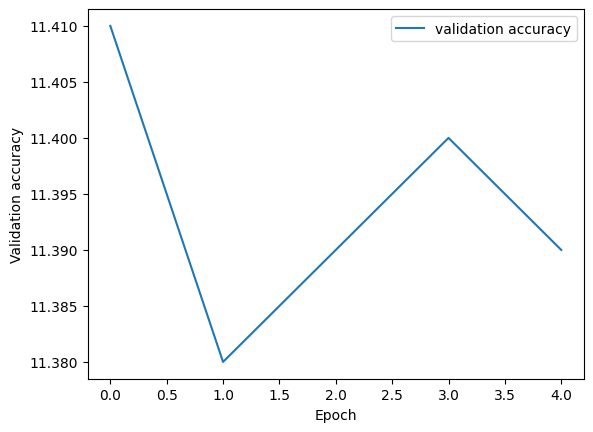

In [ ]:
plt.plot(train5['validation_accuracy'], label = 'validation accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#xavier init

class Net_xavier_init(nn.Module):
  def __init__(self,layers):
    super(Net_xavier_init, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      linear = nn.Linear(input, output)
      torch.nn.init.xavier_uniform_(linear.weight)  #xavier method for weight initialization
      self.hidden.append(linear)

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.relu(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
model6 = Net_xavier_init([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model6.parameters(), lr = 0.1)

In [ ]:
train6 =  train_model(model = model6, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

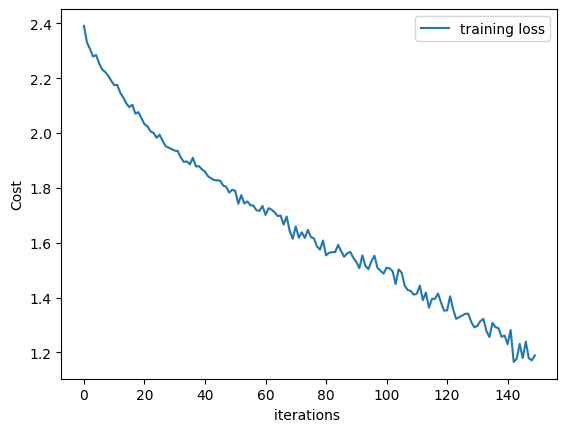

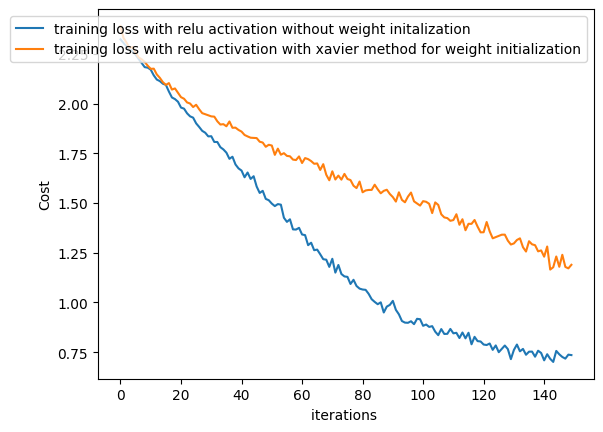

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without weight initalization')
plt.plot(train6['training_loss'], label = 'training loss with relu activation with xavier method for weight initialization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

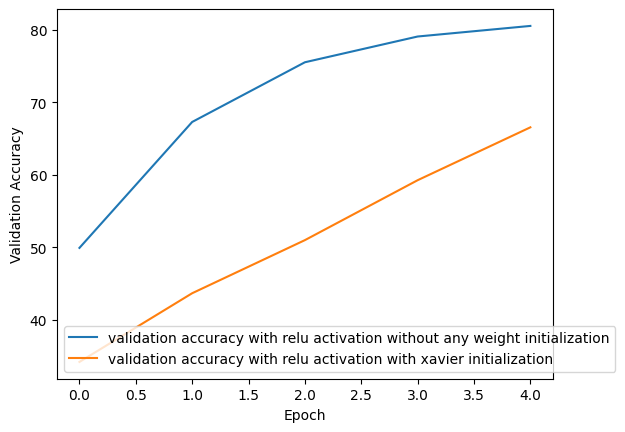

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation accuracy with relu activation without any weight initialization')
plt.plot(train6['validation_accuracy'], label = 'validation accuracy with relu activation with xavier initialization')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
class Net_xavier_tanh_init(nn.Module):
  def __init__(self,layers):
    super(Net_xavier_tanh_init, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      linear = nn.Linear(input, output)
      torch.nn.init.xavier_uniform_(linear.weight)  #xavier method for weight initialization
      self.hidden.append(linear)

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.tanh(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
model7 = Net_xavier_init([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model7.parameters(), lr = 0.1)

In [ ]:
train7 =  train_model(model = model7, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

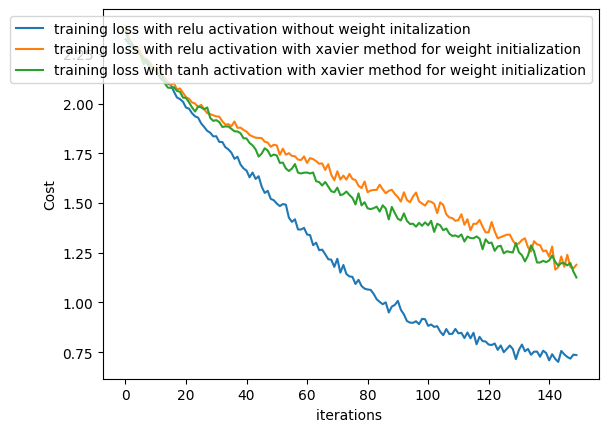

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without weight initalization')
plt.plot(train6['training_loss'], label = 'training loss with relu activation with xavier method for weight initialization')
plt.plot(train7['training_loss'], label = 'training loss with tanh activation with xavier method for weight initialization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

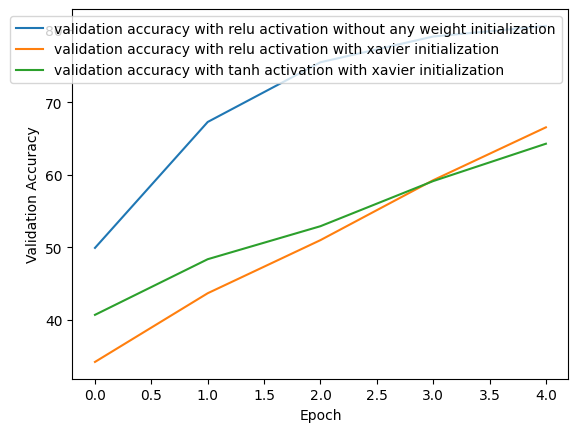

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation accuracy with relu activation without any weight initialization')
plt.plot(train6['validation_accuracy'], label = 'validation accuracy with relu activation with xavier initialization')
plt.plot(train7['validation_accuracy'], label = 'validation accuracy with tanh activation with xavier initialization')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
## he method for initialization

class Net_he_init(nn.Module):
  def __init__(self,layers):
    super(Net_he_init, self).__init__()
    self.hidden = nn.ModuleList()
    for input, output in zip(layers, layers[1:]):
      linear = nn.Linear(input, output)
      torch.nn.init.kaiming_uniform_(linear.weight)  #he method for weight initialization
      self.hidden.append(linear)

  def forward(self, x):
    L = len(self.hidden)
    for(i, layer) in zip(range(L), self.hidden):
      if i<L-1:
        x = torch.relu(layer(x))
      else:
        x = layer(x)
    return x

In [ ]:
model8 = Net_he_init([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model8.parameters(), lr = 0.1)

In [ ]:
train8 =  train_model(model = model8, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

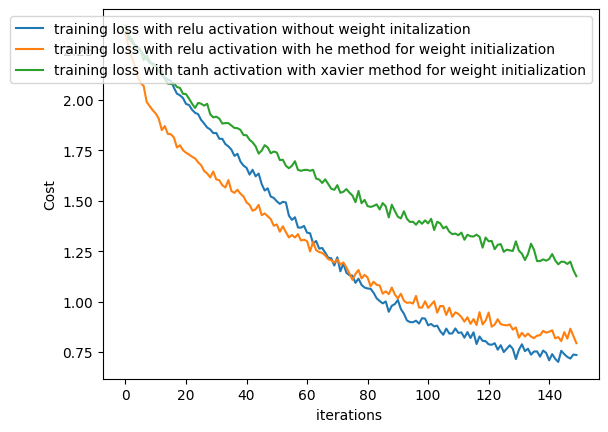

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without weight initalization')
plt.plot(train8['training_loss'], label = 'training loss with relu activation with he method for weight initialization')
plt.plot(train7['training_loss'], label = 'training loss with tanh activation with xavier method for weight initialization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

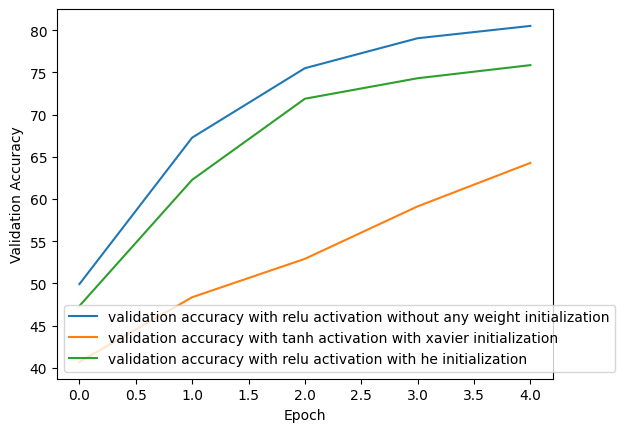

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation accuracy with relu activation without any weight initialization')
plt.plot(train7['validation_accuracy'], label = 'validation accuracy with tanh activation with xavier initialization')
plt.plot(train8['validation_accuracy'], label = 'validation accuracy with relu activation with he initialization')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Adding momentum to optimizer

In [ ]:
#momentum = 0.1

model9 = Net_relu([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model9.parameters(), lr = 0.1, momentum = 0.1)

In [ ]:
train9 =  train_model(model = model9, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

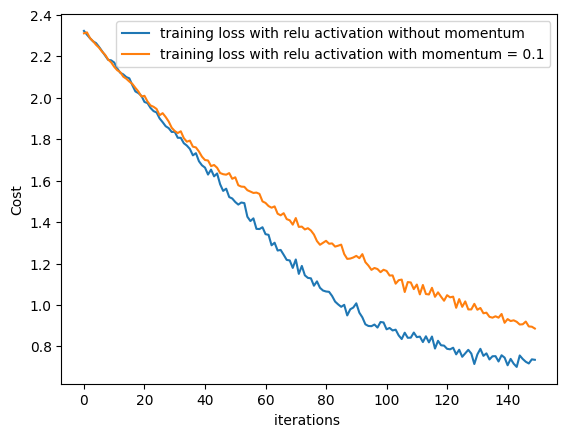

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without momentum')
plt.plot(train9['training_loss'], label = 'training loss with relu activation with momentum = 0.1')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

In [ ]:
#momentum = 0.2

model10 = Net_relu([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model10.parameters(), lr = 0.1, momentum = 0.2)

train10 =  train_model(model = model10, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

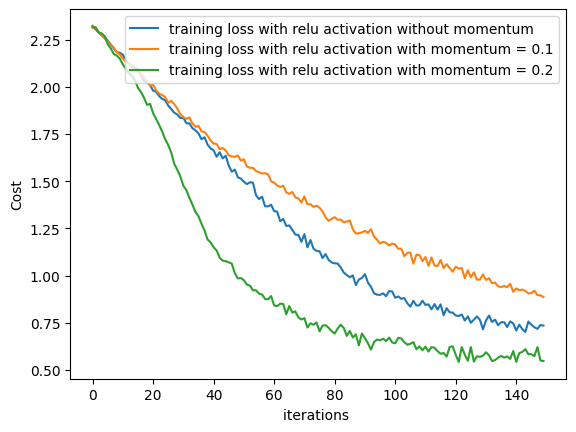

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without momentum')
plt.plot(train9['training_loss'], label = 'training loss with relu activation with momentum = 0.1')
plt.plot(train10['training_loss'], label = 'training loss with relu activation with momentum = 0.2')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

In [ ]:
#momentum = 0.5

model11 = Net_relu([784,5,10])
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model11.parameters(), lr = 0.1, momentum = 0.5)

train11 =  train_model(model = model11, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

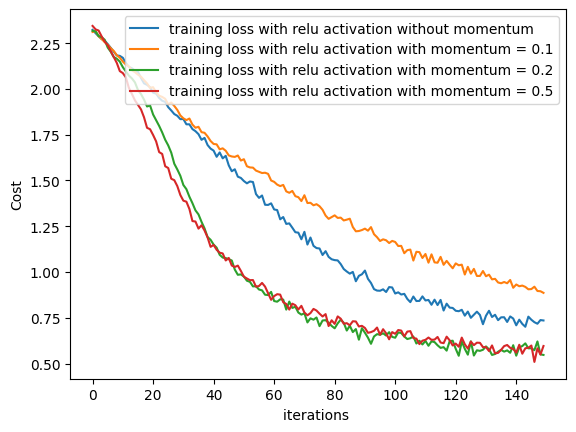

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without momentum')
plt.plot(train9['training_loss'], label = 'training loss with relu activation with momentum = 0.1')
plt.plot(train10['training_loss'], label = 'training loss with relu activation with momentum = 0.2')
plt.plot(train11['training_loss'], label = 'training loss with relu activation with momentum = 0.5')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

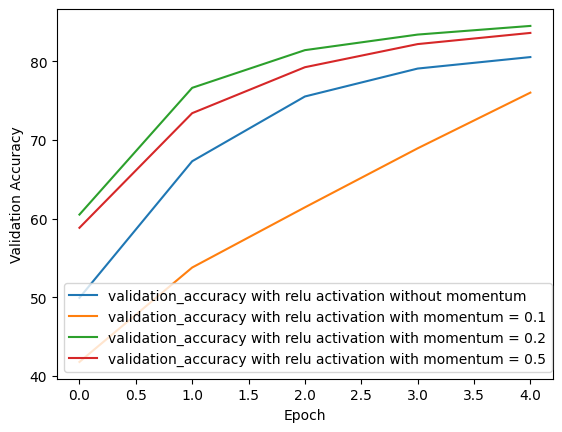

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation_accuracy with relu activation without momentum')
plt.plot(train9['validation_accuracy'], label = 'validation_accuracy with relu activation with momentum = 0.1')
plt.plot(train10['validation_accuracy'], label = 'validation_accuracy with relu activation with momentum = 0.2')
plt.plot(train11['validation_accuracy'], label = 'validation_accuracy with relu activation with momentum = 0.5')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Batch Normalization

In [ ]:
class NetBatchNorm1(nn.Module):

    def __init__(self, in_size, n_hidden1, out_size):
        super(NetBatchNorm1, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)

    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.linear2(x)
        return x

In [ ]:
model12 = NetBatchNorm1(in_size = 784, n_hidden1 = 5, out_size = 10)

In [ ]:
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model12.parameters(), lr = 0.1)

In [ ]:
train12 =  train_model(model = model12, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

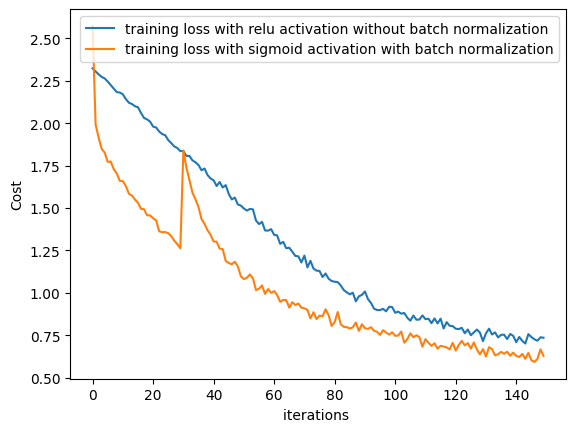

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without batch normalization')
plt.plot(train12['training_loss'], label = 'training loss with sigmoid activation with batch normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

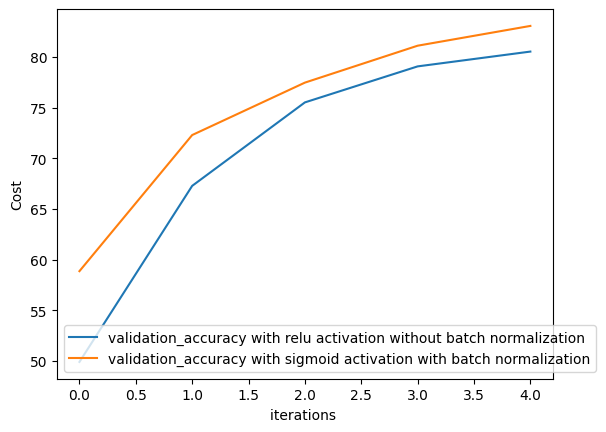

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation_accuracy with relu activation without batch normalization')
plt.plot(train12['validation_accuracy'], label = 'validation_accuracy with sigmoid activation with batch normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

In [ ]:
class NetBatchNorm2(nn.Module):

    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetBatchNorm2, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)

    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x

In [ ]:
model13 = NetBatchNorm2(in_size = 784, n_hidden1 = 5, n_hidden2 = 5, out_size = 10)

In [ ]:
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset = dataset_train, batch_size = 2000, shuffle= True)
val_loader = DataLoader(dataset = dataset_val, batch_size = 5000, shuffle = False)
optimizer = optim.SGD(model13.parameters(), lr = 0.1)

In [ ]:
train13 =  train_model(model = model13, criterion = criterion, train_loader = train_loader, val_loader = val_loader, optimizer = optimizer, epochs = 5)

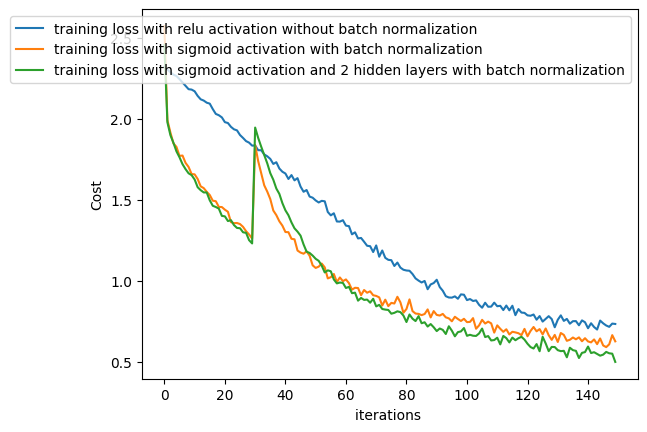

In [ ]:
plt.plot(train2['training_loss'], label = 'training loss with relu activation without batch normalization')
plt.plot(train12['training_loss'], label = 'training loss with sigmoid activation with batch normalization')
plt.plot(train13['training_loss'], label = 'training loss with sigmoid activation and 2 hidden layers with batch normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

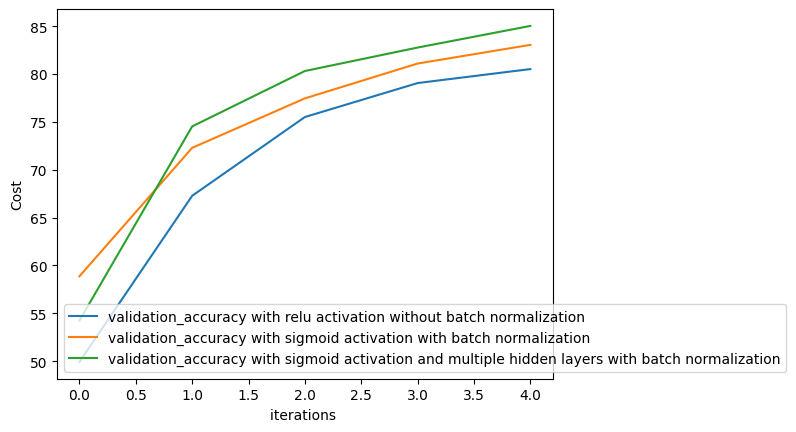

In [ ]:
plt.plot(train2['validation_accuracy'], label = 'validation_accuracy with relu activation without batch normalization')
plt.plot(train12['validation_accuracy'], label = 'validation_accuracy with sigmoid activation with batch normalization')
plt.plot(train13['validation_accuracy'], label = 'validation_accuracy with sigmoid activation and multiple hidden layers with batch normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()